In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('MS_Dhoni_ODI_record.csv')
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,v West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,v England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,v Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,v Sri Lanka,Leeds,06/07/2019,ODI # 4187


Data Cleaning - Opposition name says "v Aus" we can remove 'v '

In [3]:
df['opposition'] = df['opposition'].apply(lambda x: x[2:])
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,ODI # 2236
...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,ODI # 4175
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019,ODI # 4179
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,ODI # 4182
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019,ODI # 4187


Add a 'feature' - 'year' column using the match date columnt

First convert date column into datetime format

In [4]:
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df['year'] = df['date'].dt.year.astype(int)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019


Create a column to distinguish between out and not out
- The apply method in Pandas allows you to apply a function to each element in a DataFrame or Series.
- In this case, the function being applied is str, which is the built-in Python function for converting values into strings.
- By applying str to each element in the 'score' column, we are converting the numerical or other data types in that column into string data types..

In [5]:
df['score'] = df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,ODI # 2199,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,ODI # 2201,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,ODI # 2202,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,ODI # 2235,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,ODI # 2236,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,ODI # 4175,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,ODI # 4179,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,ODI # 4182,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,ODI # 4187,2019,0


Dropping the odi_number feature because it adds no value to the analysis

In [6]:
df.drop(columns = 'odi_number', inplace = True)
df

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7*,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42*,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,2019-07-06,2019,0


Dropping those

In [7]:
df_new = df.loc[((df['score'] != 'DNB') & (df['score'] != 'TDNB')),'runs_scored':]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.8,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


Fixing the data types of numerical columns

In [8]:
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)

df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,year,not_out
0,0,1,0.00,0,0,Bangladesh,Chattogram,2004-12-23,2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,2004-12-26,2004,0
2,7,2,350.00,0,1,Bangladesh,Dhaka,2004-12-27,2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,2005-04-02,2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,2005-04-05,2005,0
...,...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,2019-06-22,2019,0
345,56,61,91.80,3,2,West Indies,Manchester,2019-06-27,2019,1
346,42,31,135.48,4,1,England,Birmingham,2019-06-30,2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,2019-07-02,2019,0


15/04/2024

opposition
Afghanistan       36
Africa XI        174
Australia       1660
Bangladesh       569
Bermuda           29
England         1546
Hong Kong        109
Ireland           34
Netherlands       19
New Zealand      940
Pakistan        1231
South Africa     830
Sri Lanka       2383
West Indies     1005
Zimbabwe         208
Name: runs_scored, dtype: int32


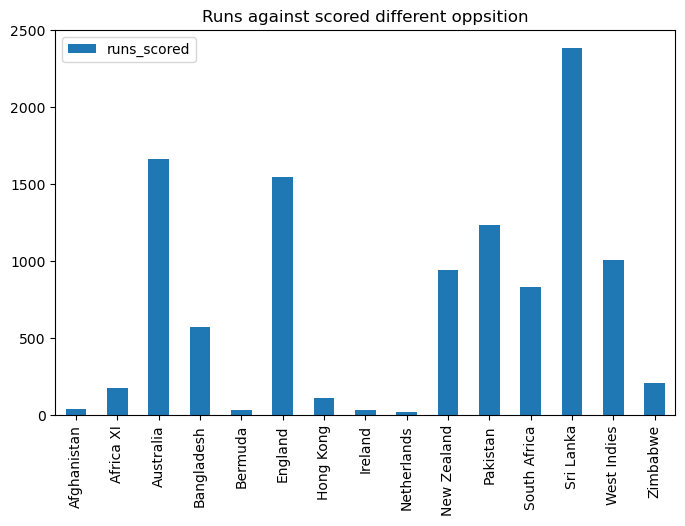

In [9]:
grouped_by_opposition = df_new.groupby('opposition')

sum_of_runs_scored = grouped_by_opposition['runs_scored'].sum()
print(sum_of_runs_scored)

runs_scored_by_opposition = pd.DataFrame(sum_of_runs_scored).reset_index()

runs_scored_by_opposition.plot(x= 'opposition', kind = 'bar' , title='Runs against scored different oppsition', figsize= (8,5))

plt.xlabel(None)
plt.show()

Boxplot of runs against various opponents

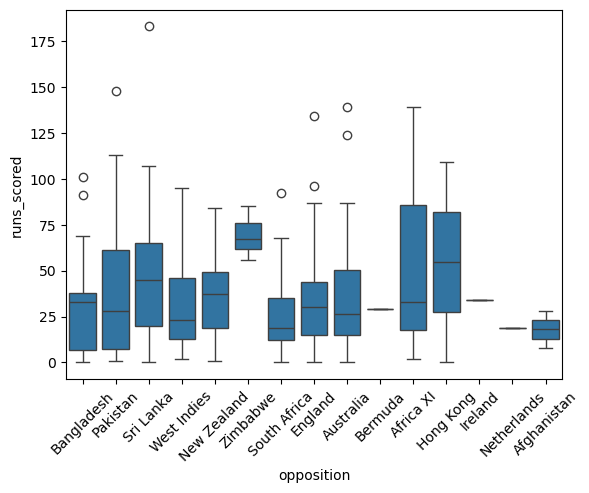

In [10]:
sns.boxplot(x='opposition', y ='runs_scored', data  = df_new)
plt.xticks(rotation = 45) #line added later
plt.show()

Looks Crowded - Let us retain only major countries
List of oppositions to filter

In [11]:
opposition_list = ['England', 'Australia', 'West Indies', 'South Africa', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Bangladesh']

Filter rows where 'opposition' is in the list

In [12]:
df_filtered = df_new[df_new['opposition'].isin(opposition_list)]

Sort the filtered dataframe in descending order of 'runs_scored'

In [13]:
df_filtered = df_filtered.sort_values(by = 'runs_scored', ascending = False)

Redraw the Boxplot but on the filtered Opposition List

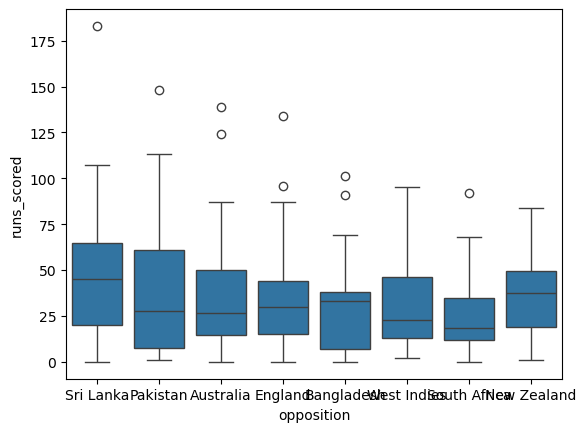

In [14]:
sns.boxplot(x='opposition', y ='runs_scored', data  = df_filtered)
plt.show()

Data on x-axis is crowded hence use xticks(rotation=45) to rotate values by 45 degree

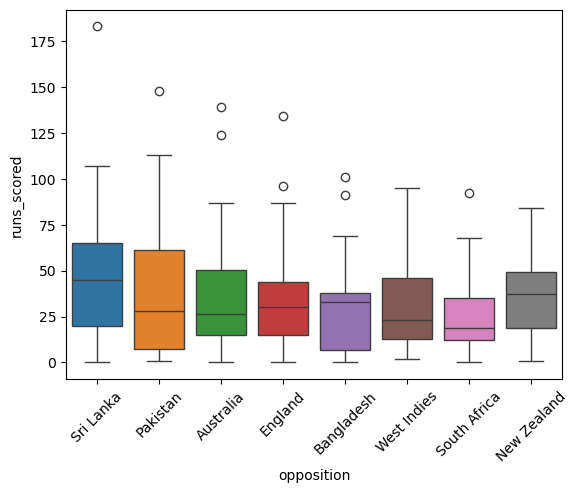

In [15]:
sns.boxplot(x = 'opposition', y ='runs_scored', data  = df_filtered, hue = 'opposition')
plt.xticks(rotation = 45)
plt.show()

Violin Plot

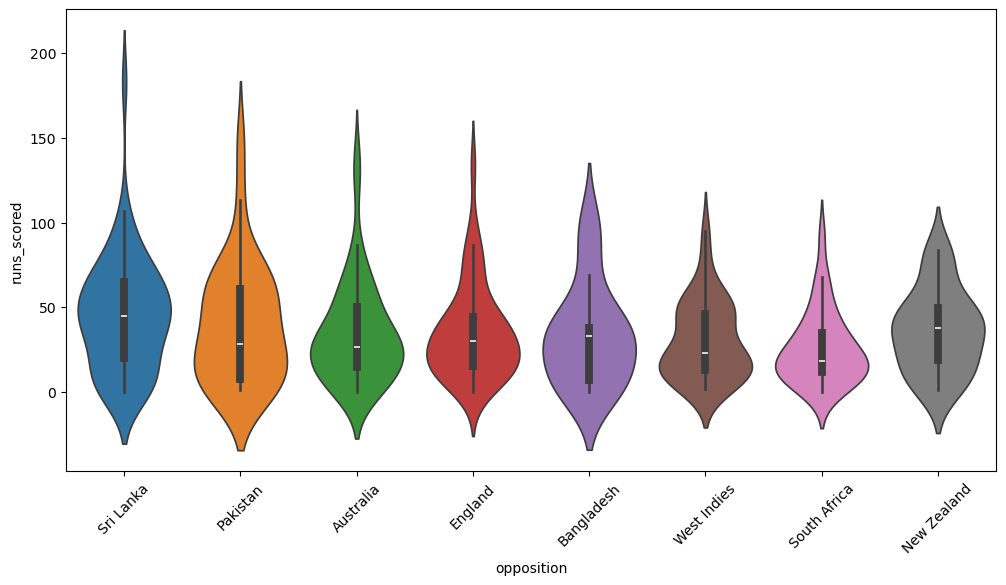

In [16]:
plt.figure(figsize=(12,6))
sns.violinplot(x = 'opposition', y ='runs_scored', data  = df_filtered, hue = 'opposition')
plt.xticks(rotation = 45)
plt.show()

Distribution plot with and without KDE

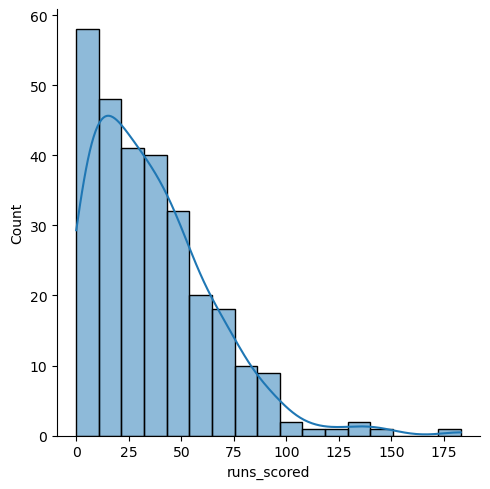

In [17]:
sns.displot(data = df_filtered, x = 'runs_scored', kde = True)
plt.show()

We see that there is a right/positive skew, so there is a long tail to the right 

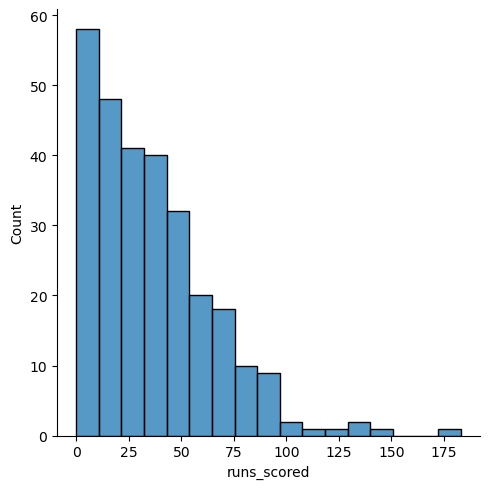

In [18]:
sns.displot(data = df_filtered, x = 'runs_scored', kde = False)
plt.show()

Histogram with bins

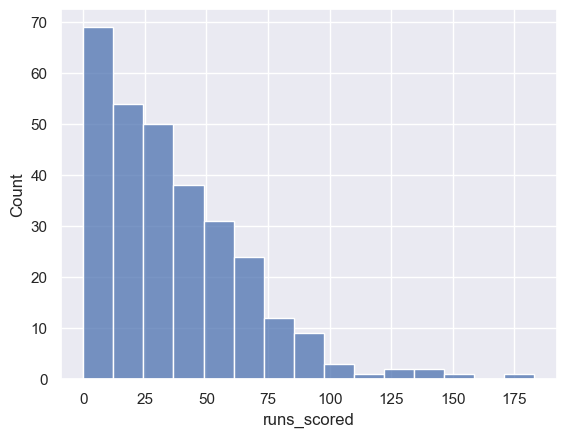

In [19]:
sns.set(style = 'darkgrid')
sns.histplot(data = df_new, x = 'runs_scored', bins = 15)
plt.show()

KDE is useful to check individual probability of each category. We use cumulative KDE - KERNEL DISTRIBUTION ESTIMATION - probability ka estimation

KDE plot

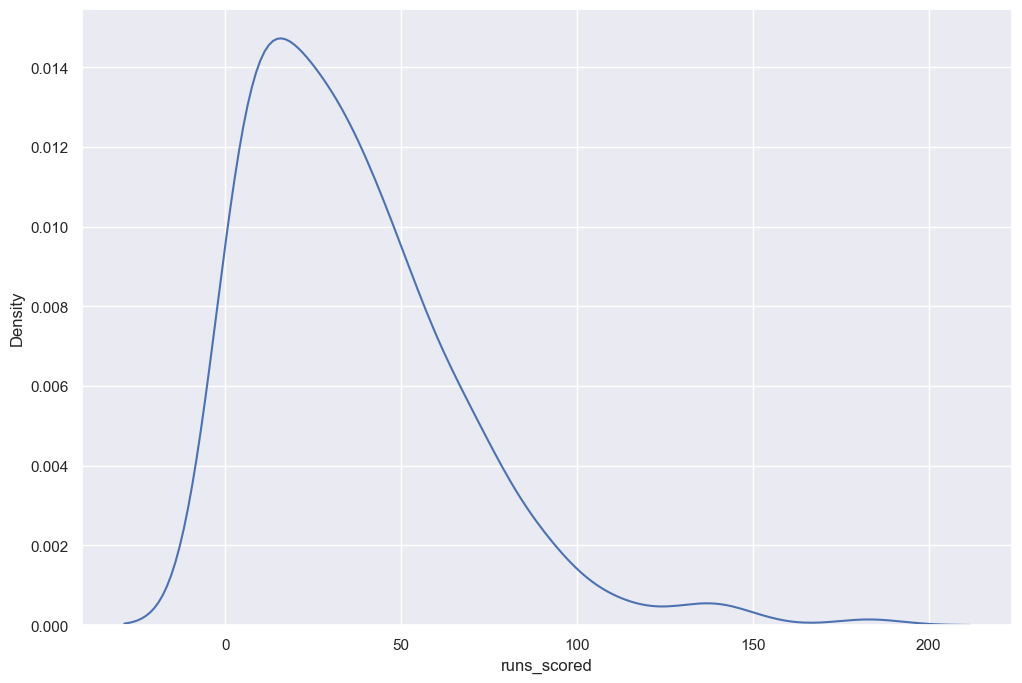

In [20]:
plt.figure(figsize = (12,8))
sns.kdeplot(data = df_new, x = 'runs_scored')
plt.show()

KDE plot with cumulative probability

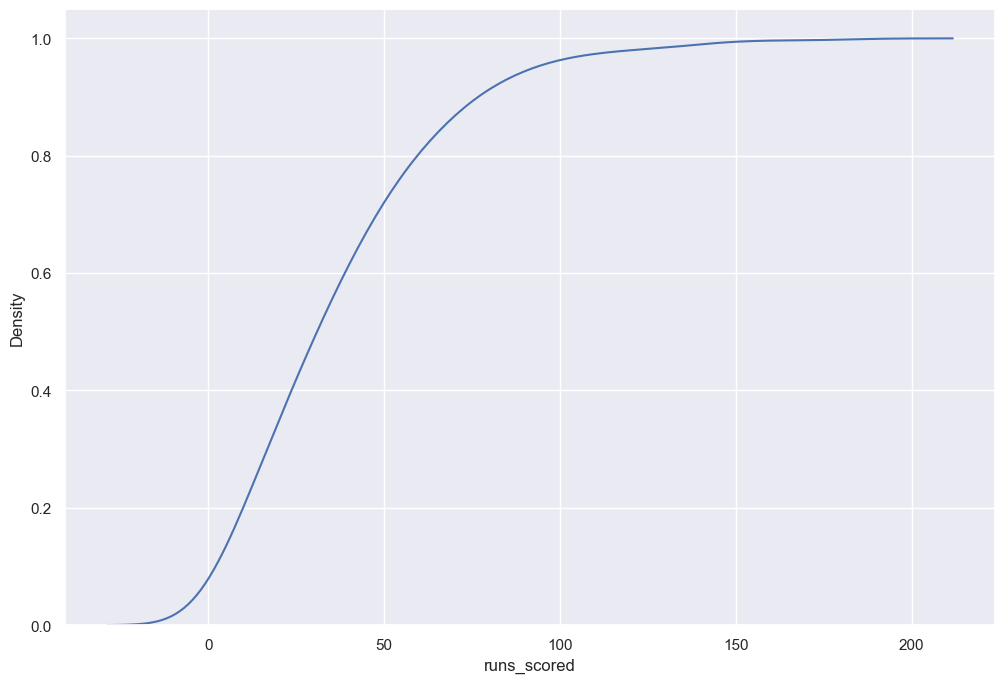

In [21]:
plt.figure(figsize = (12,8))
sns.kdeplot(data = df_new, x = 'runs_scored', cumulative = True )
plt.show()

Joint Plot

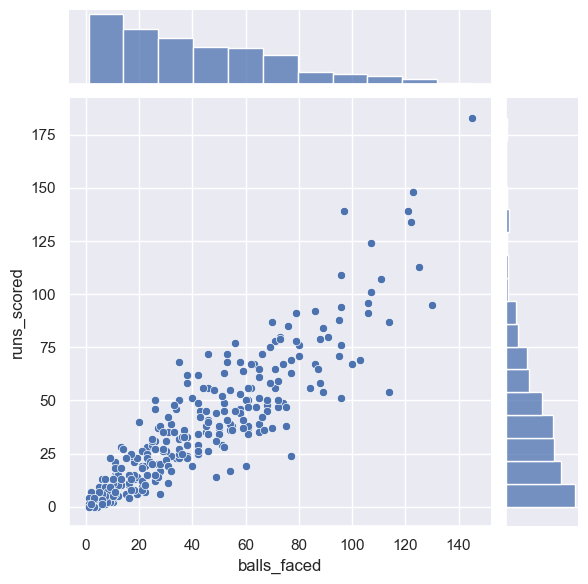

In [22]:
sns.jointplot(data = df_new, x = 'balls_faced', y = 'runs_scored', kind = 'scatter')
plt.show()

Heat Map
- Calculate the correlation matrix

In [23]:
correlation_matrix = df_new[['balls_faced', 'runs_scored']].corr()

Create heatmap

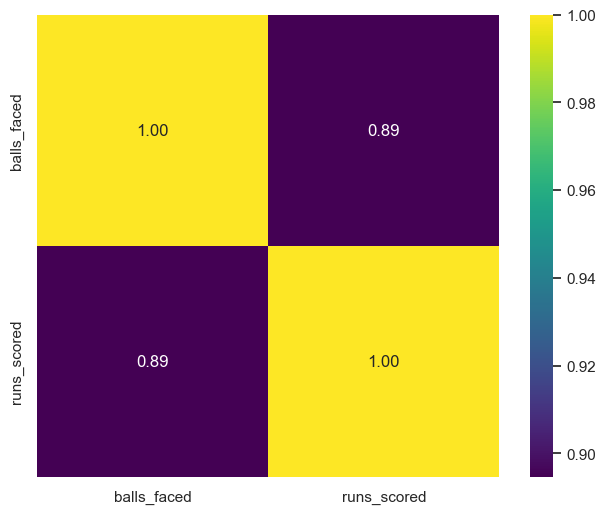

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(data = correlation_matrix, annot = True , cmap = 'viridis', square = True, fmt = ".2f")
plt.show()

In [25]:
# # df_new['sr_opposition'] = (df_new['runs_scored'].isin(opposition_list)/df_new['balls_faced'].isin(opposition_list))*100
# # df_new
# if df_filtered['opposition'].isin(opposition_list):
#     df_new['strike_rate_oppo'] = (df_new['runs_scored']/df_new['balls_faced'])*100

# df_new

# Doesn't work

In [26]:
grouped_by_opposition = df_filtered.groupby('opposition')

In [27]:
agg_sum = grouped_by_opposition.agg({'balls_faced': 'sum', 'runs_scored': 'sum'})

In [28]:
df_strike_rate = agg_sum

In [29]:
df_strike_rate['strike_rate'] = (df_strike_rate['runs_scored']/df_strike_rate['balls_faced'])*100

In [30]:
print(df_strike_rate)

              balls_faced  runs_scored  strike_rate
opposition                                         
Australia            2052         1660    80.896686
Bangladesh            682          569    83.431085
England              1758         1546    87.940842
New Zealand          1140          940    82.456140
Pakistan             1361         1231    90.448200
South Africa          950          830    87.368421
Sri Lanka            2645         2383    90.094518
West Indies          1108         1005    90.703971


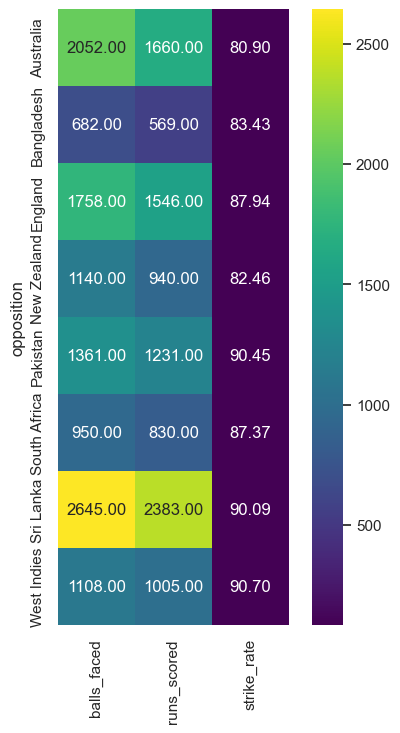

In [31]:
plt.figure(figsize = (6,8))
sns.heatmap(data = df_strike_rate, annot = True , cmap = 'viridis', square = True, fmt = ".2f")
plt.show()

#Heatmap will be a bad practice here.
#Bad graph - strike rate scale is different from run scored and balls faced

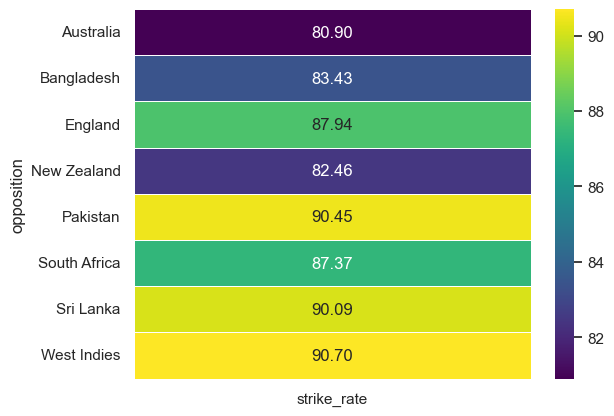

In [32]:
# Good grpah - only retain strike rate column

df_strike_rate = df_strike_rate[['strike_rate']]
sns.heatmap(data = df_strike_rate, lw = 0.5, annot = True , cmap = 'viridis', fmt = ".2f")
plt.show()

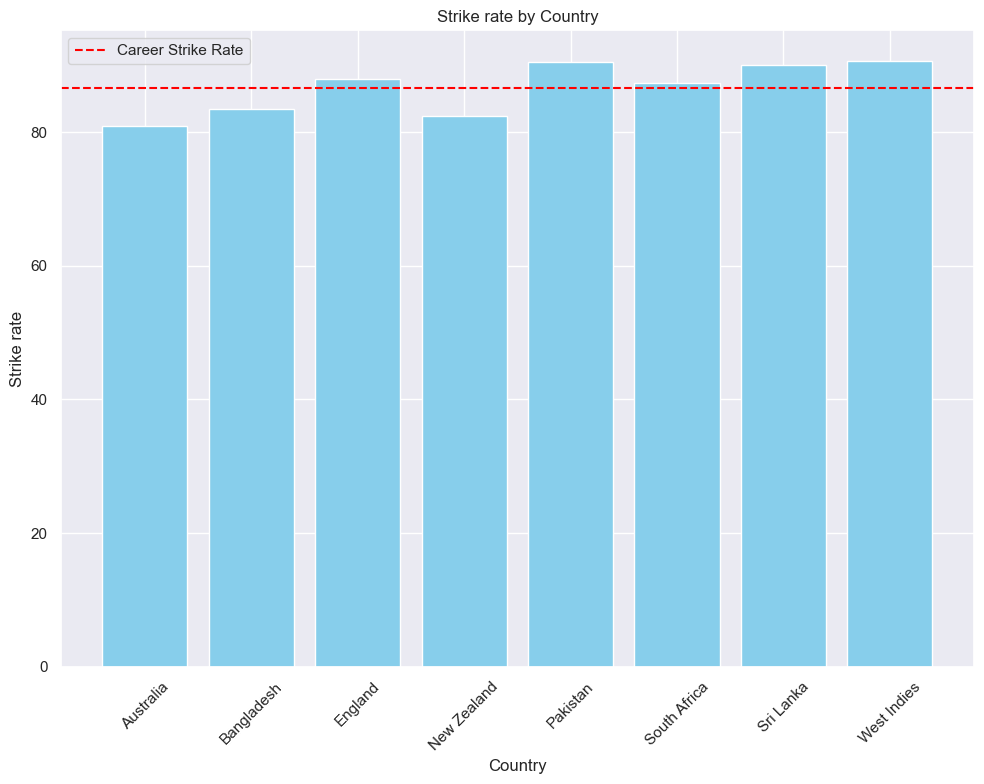

In [33]:
#Resetting index to make 'opposition' a regular column
df_strike_rate.reset_index(inplace = True)
plt.figure(figsize = (10,8))

plt.bar(df_strike_rate['opposition'], df_strike_rate['strike_rate'], color='skyblue')

aggregate_strike_rate = df_strike_rate['strike_rate'].mean()
plt.axhline(y = aggregate_strike_rate, color='red', ls = '--', label = 'Career Strike Rate' )

# Set Labels and Title
plt.xlabel('Country')
plt.ylabel('Strike rate')
plt.title("Strike rate by Country")
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Runs in Boundaries

In [34]:
grouped_by_opposition = df_filtered.groupby('opposition')

In [35]:
agg_sum = grouped_by_opposition.agg({'runs_scored': 'sum', 'fours': 'sum', 'sixes': 'sum'})

In [36]:
df_runs_in_boundaries = agg_sum
df_runs_in_boundaries

,runs_scored,fours,sixes
opposition,,,
Australia,1660,112,33
Bangladesh,569,49,3
England,1546,129,34
New Zealand,940,73,20
Pakistan,1231,108,25
South Africa,830,67,18
Sri Lanka,2383,182,45
West Indies,1005,63,28


In [37]:
df_runs_in_boundaries['runs_in_boundaries'] = df_runs_in_boundaries['fours'] * 4 + df_runs_in_boundaries['sixes'] * 6
df_runs_in_boundaries

,runs_scored,fours,sixes,runs_in_boundaries
opposition,,,,
Australia,1660,112,33,646
Bangladesh,569,49,3,214
England,1546,129,34,720
New Zealand,940,73,20,412
Pakistan,1231,108,25,582
South Africa,830,67,18,376
Sri Lanka,2383,182,45,998
West Indies,1005,63,28,420


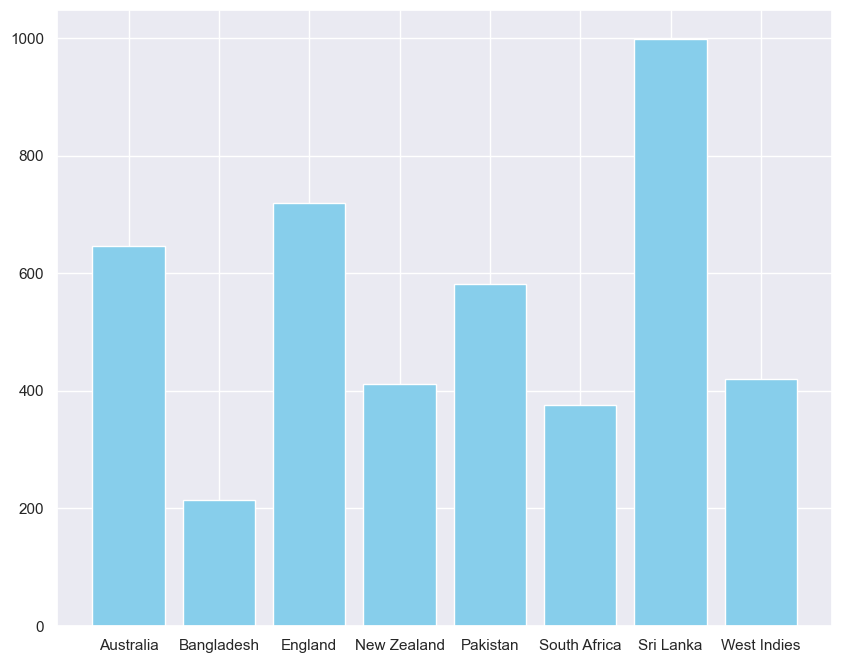

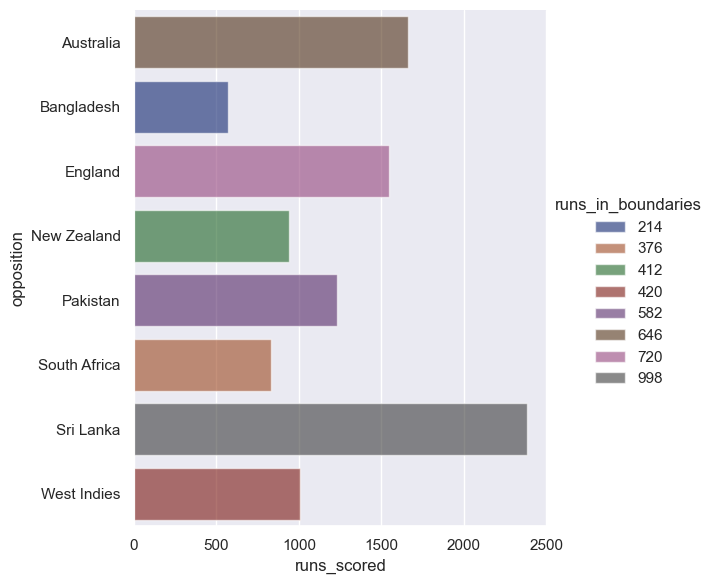

In [38]:
# For heat map we need the opposition column as index , for else we need the opposition column to not be Index
df_runs_in_boundaries.reset_index(inplace = True)
plt.figure(figsize = (10,8))

plt.bar(df_runs_in_boundaries['opposition'], df_runs_in_boundaries['runs_in_boundaries'], color = 'skyblue')
sns.catplot(
    data=df_runs_in_boundaries, kind="bar",
    x='runs_scored', y='opposition', hue='runs_in_boundaries',
    errorbar="sd", palette="dark", alpha=.6, height=6)

#Not this way

In [39]:
df_runs_in_boundaries['runs_scored']

0    1660
1     569
2    1546
3     940
4    1231
5     830
6    2383
7    1005
Name: runs_scored, dtype: int32

In [40]:
df_runs_in_boundaries['runs_in_boundaries']

0    646
1    214
2    720
3    412
4    582
5    376
6    998
7    420
Name: runs_in_boundaries, dtype: int32

Stacked Plot

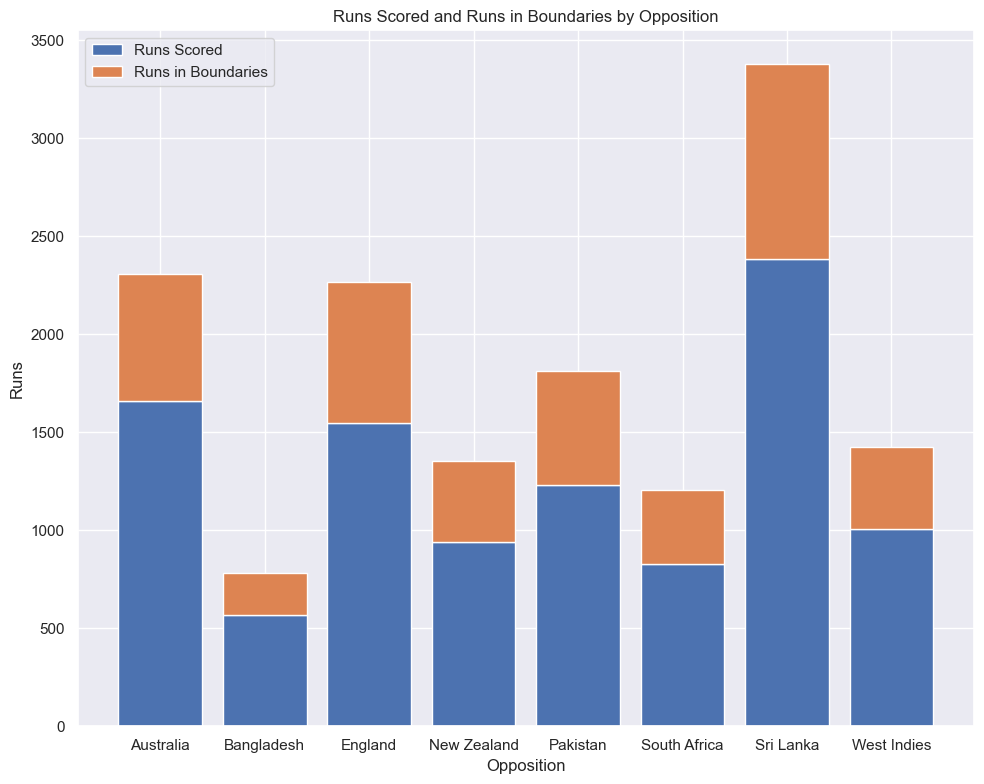

In [40]:
#Sir's bar plot

plt.figure(figsize = (10,8))

plt.bar(df_runs_in_boundaries['opposition'], df_runs_in_boundaries['runs_scored'], label = 'Runs Scored')
plt.bar(df_runs_in_boundaries['opposition'], df_runs_in_boundaries['runs_in_boundaries'], bottom=df_runs_in_boundaries['runs_scored'],
        label = 'Runs in Boundaries')

# Set Labels and Title
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title("Runs Scored and Runs in Boundaries by Opposition")
plt.legend()
#tight layout ensures graph is good looking
plt.tight_layout()
plt.show()

Side-By-Side Plot

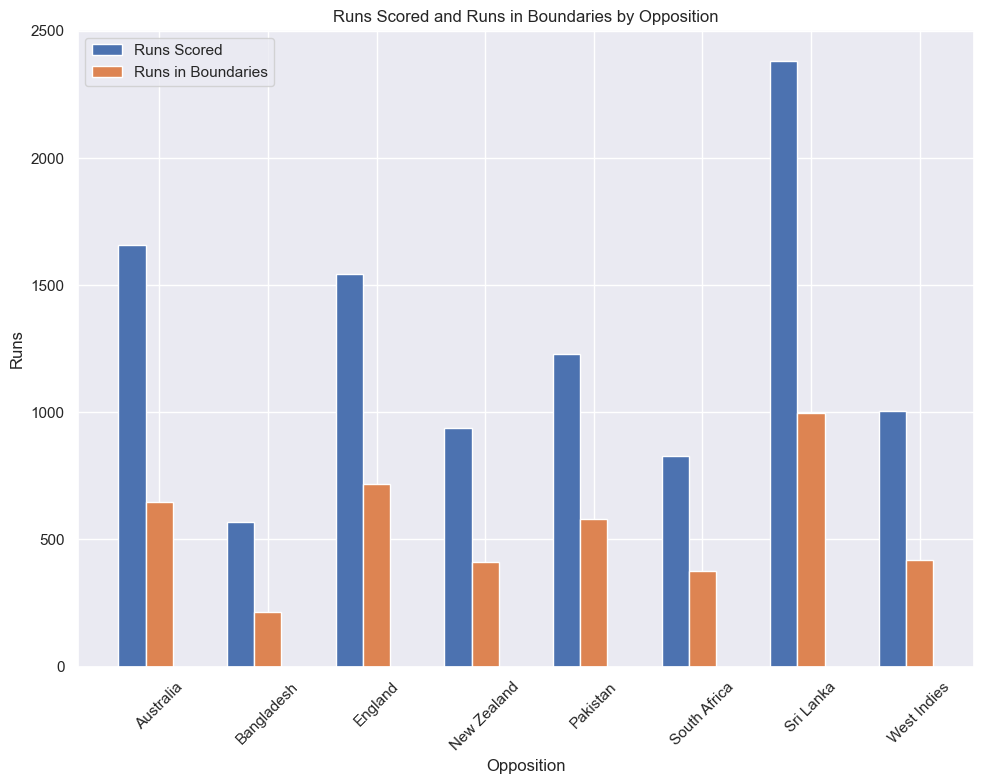

In [42]:
#Sir's bar plot

plt.figure(figsize = (10,8))
bar_width = 0.25

index = np.arange(len(df_runs_in_boundaries['opposition']))

plt.bar(index, df_runs_in_boundaries['runs_scored'], width = bar_width, label = 'Runs Scored')
plt.bar(index + bar_width, df_runs_in_boundaries['runs_in_boundaries'], width = bar_width, label = 'Runs in Boundaries')

# Set Labels and Title
plt.xlabel('Opposition')
plt.ylabel('Runs')
plt.title("Runs Scored and Runs in Boundaries by Opposition")
plt.legend()
plt.xticks(index + bar_width, df_runs_in_boundaries['opposition'], rotation = 45)
#tight layout ensures graph is good looking
plt.tight_layout()
plt.show()

In [42]:
df_pair_plot = df_filtered[['opposition', 'runs_scored', 'balls_faced', 'fours', 'sixes']]
print(df_pair_plot)

       opposition  runs_scored  balls_faced  fours  sixes
21      Sri Lanka          183          145     15     10
4        Pakistan          148          123     15      4
228     Australia          139          121     12      5
284       England          134          122     10      6
146     Australia          124          107      9      3
..            ...          ...          ...    ...    ...
74   South Africa            0            4      0      0
273     Australia            0            3      0      0
171     Australia            0            1      0      0
223       England            0            4      0      0
0      Bangladesh            0            1      0      0

[284 rows x 5 columns]


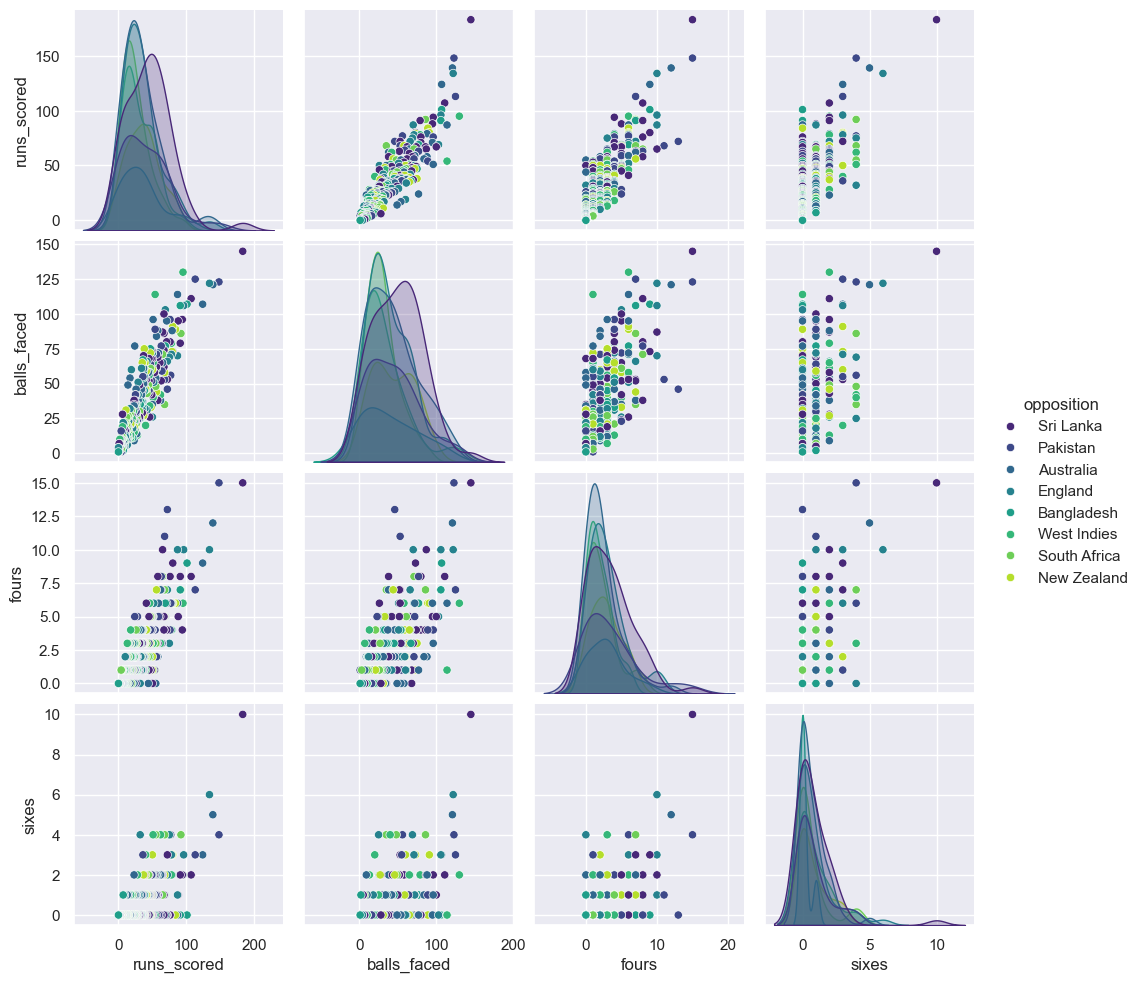

In [43]:
#Pair Plot

sns.pairplot(df_pair_plot, hue = 'opposition', palette = 'viridis')
plt.show()